## Objective: Extract insights using visual and statistical exploration.

# Import Libraries

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

sns.set(style = 'whitegrid')

# Load and Preview data

In [5]:
df = pd.read_csv('tested.csv')
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# Data Overview

In [16]:
df.info()
df.describe(include = 'all')
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

Numerical Columns:

PassengerId, Survived, Pclass, Age, SibSp, Parch, Fare

Categorical Columns:

Name, Sex, Ticket, Cabin, Embarked

Notable observations:

Cabin has a very high number of missing values (327 out of 418), which may limit its usefulness in analysis.

Age has 86 missing values (around 20.5% of entries).

Fare has just 1 missing value, which is easy to impute.

Potential Outliers
From the .describe() output:

Age ranges from 0.17 to 76, which seems reasonable.

Fare ranges from 0 to 512.33, suggesting potential fare outliers on the high end.

SibSp (siblings/spouses aboard) and Parch (parents/children aboard) also show some high values:

SibSp max = 8

Parch max = 9

These could be outliers depending on the context and frequency.


# Univariate Analysis

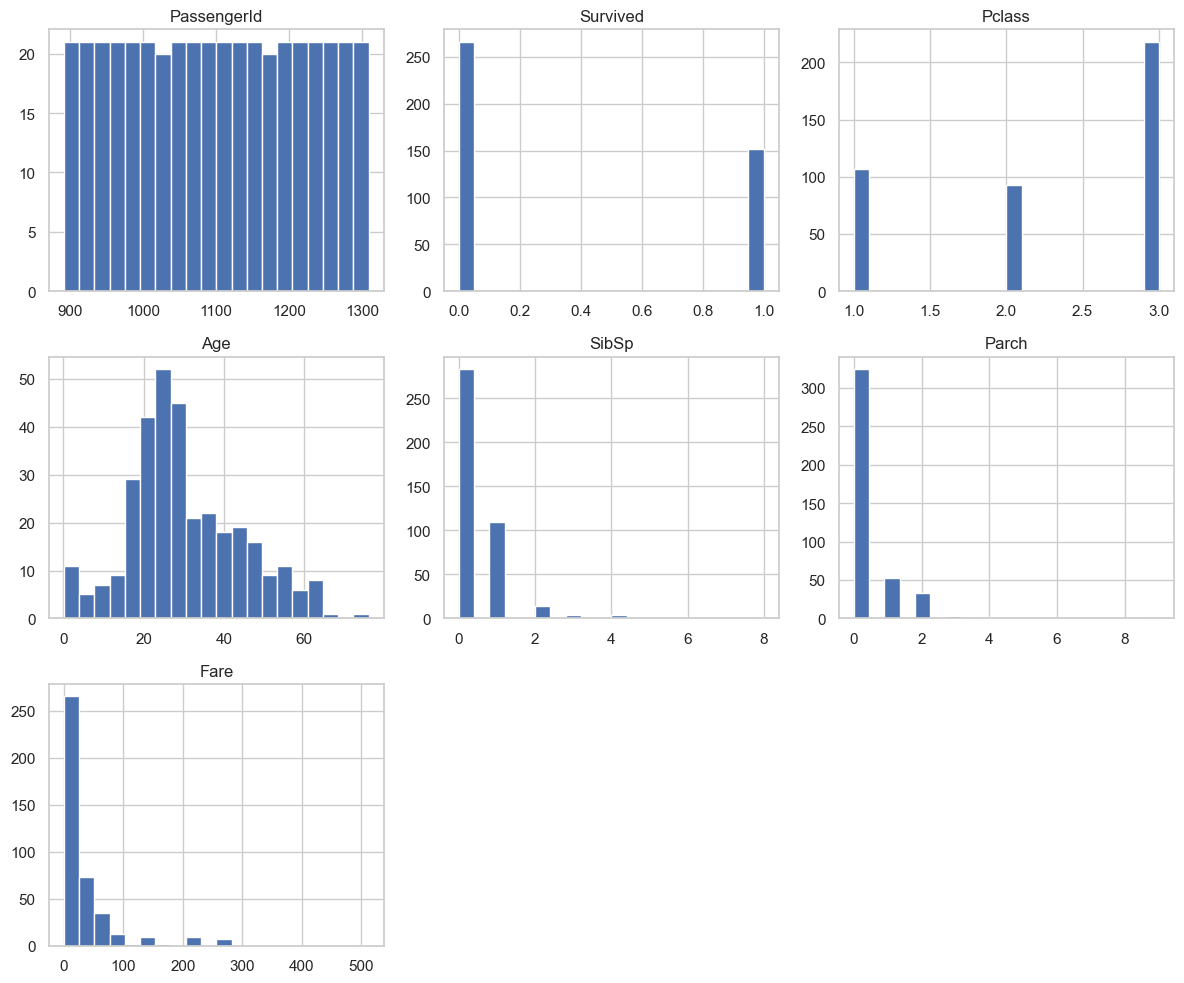

Name
Peter, Master. Michael J                        1
Kelly, Mr. James                                1
Gale, Mr. Harry                                 1
Bonnell, Miss. Caroline                         1
Conlon, Mr. Thomas Henry                        1
                                               ..
Connolly, Miss. Kate                            1
Svensson, Mr. Johan Cervin                      1
Hirvonen, Mrs. Alexander (Helga E Lindqvist)    1
Wirz, Mr. Albert                                1
Myles, Mr. Thomas Francis                       1
Name: count, Length: 418, dtype: int64


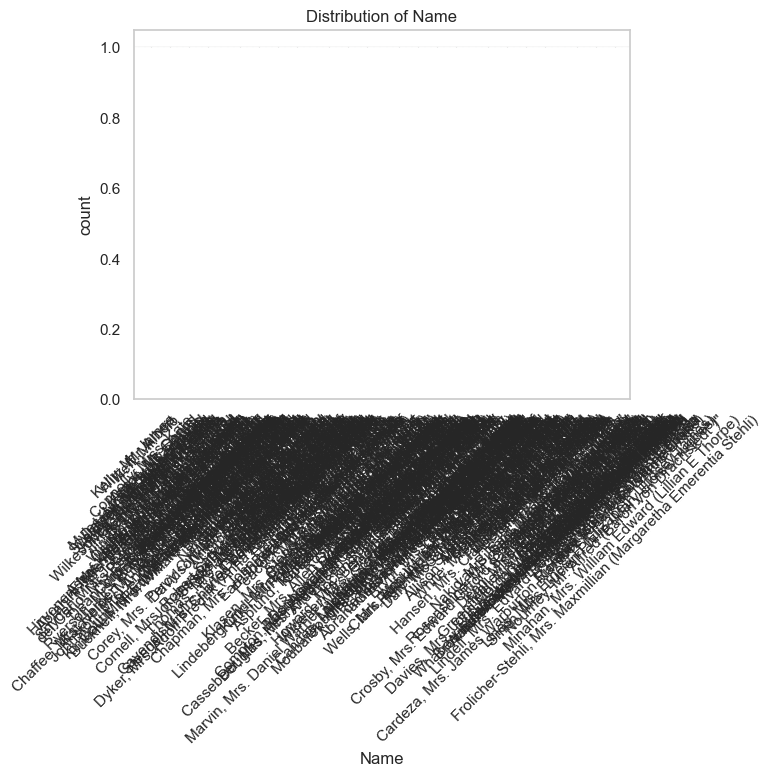

Sex
male      266
female    152
Name: count, dtype: int64


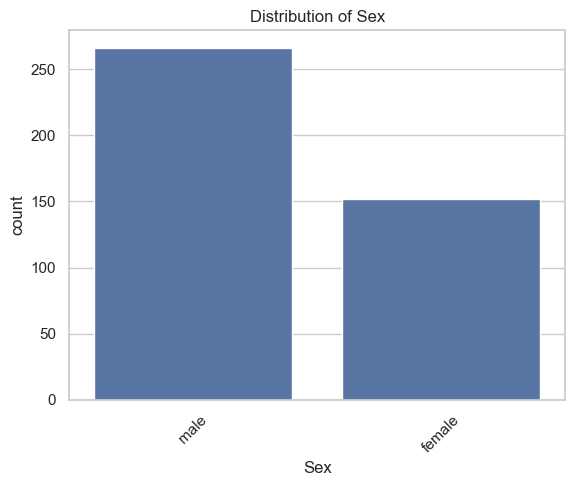

Ticket
PC 17608              5
CA. 2343              4
113503                4
347077                3
SOTON/O.Q. 3101315    3
                     ..
330972                1
7538                  1
3101298               1
315154                1
240276                1
Name: count, Length: 363, dtype: int64


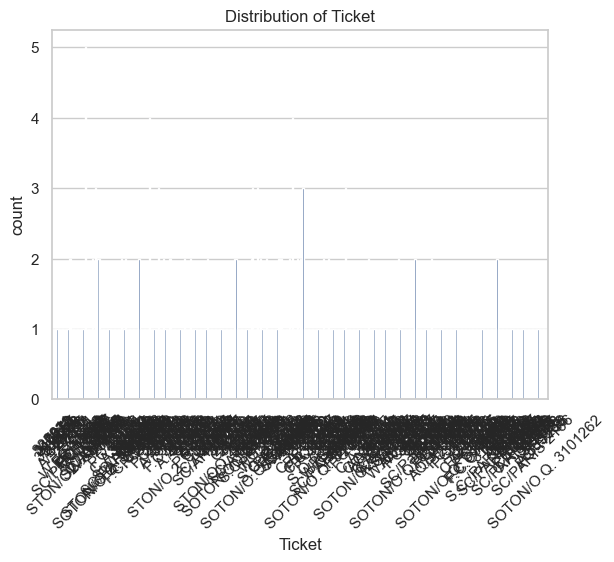

Cabin
B57 B59 B63 B66    3
B45                2
C23 C25 C27        2
C78                2
C31                2
                  ..
B41                1
C7                 1
D40                1
D38                1
C105               1
Name: count, Length: 76, dtype: int64


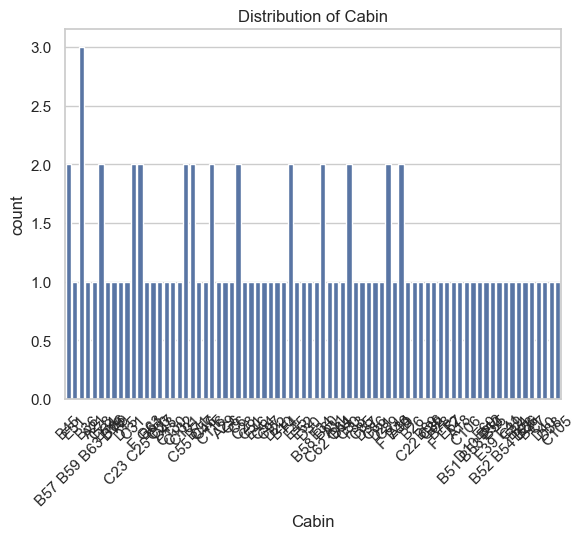

Embarked
S    270
C    102
Q     46
Name: count, dtype: int64


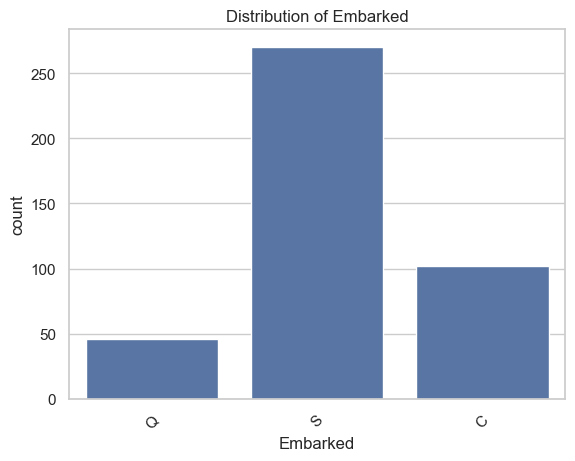

<Figure size 640x480 with 0 Axes>

In [21]:
# For numerical columns
df.hist(figsize = (12,10), bins = 20)
plt.tight_layout()
plt.show()


# For categorical columns
for col in df.select_dtypes(include = 'object'):
    print(df[col].value_counts())
    sns.countplot(data = df, x = col)
    plt.xticks(rotation = 45)
    plt.title(f'Distribution of {col}')
    plt.show()
    plt.savefig('Histogram Plot')

Age
Distribution: Slightly right-skewed with a peak around ages 20–30.

Outliers: A few very young passengers (below 1 year) and older ones (70+), but within realistic human ranges.

Fare
Distribution: Heavily right-skewed — many passengers paid low fares, while a few paid extremely high ones (>500).

Outliers: Strong presence of high-end outliers that may affect statistical measures.

SibSp (Siblings/Spouses Aboard)
Distribution: Skewed right. Most passengers traveled with 0–1 relatives.

Outliers: A few with up to 8 siblings/spouses.

Parch (Parents/Children Aboard)
Distribution: Similar to SibSp — right-skewed.

Outliers: A handful with 3–6 parents/children, and one entry with 9.

Pclass
Distribution: Discrete, categorical (1st, 2nd, 3rd class), with most passengers in 3rd class.

# Bivariate Analysis

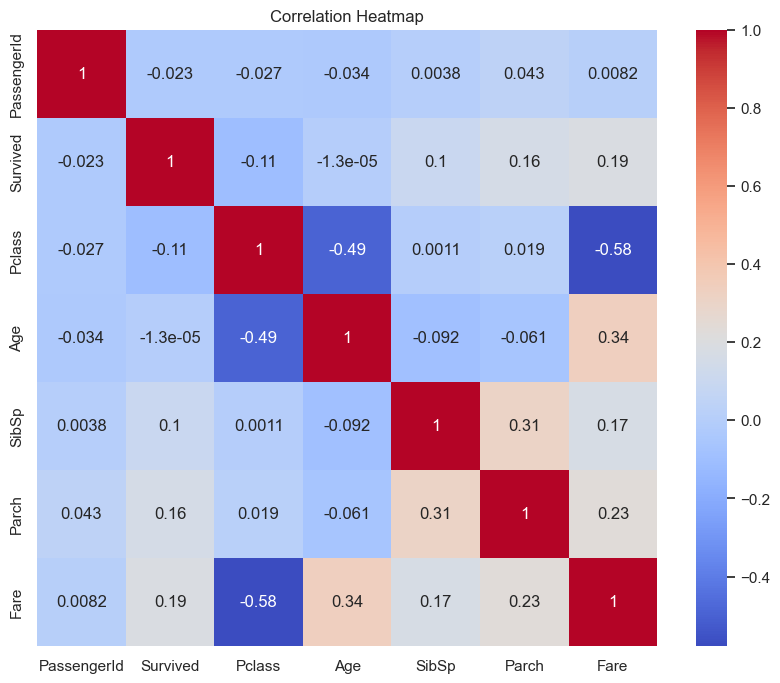

<Figure size 640x480 with 0 Axes>

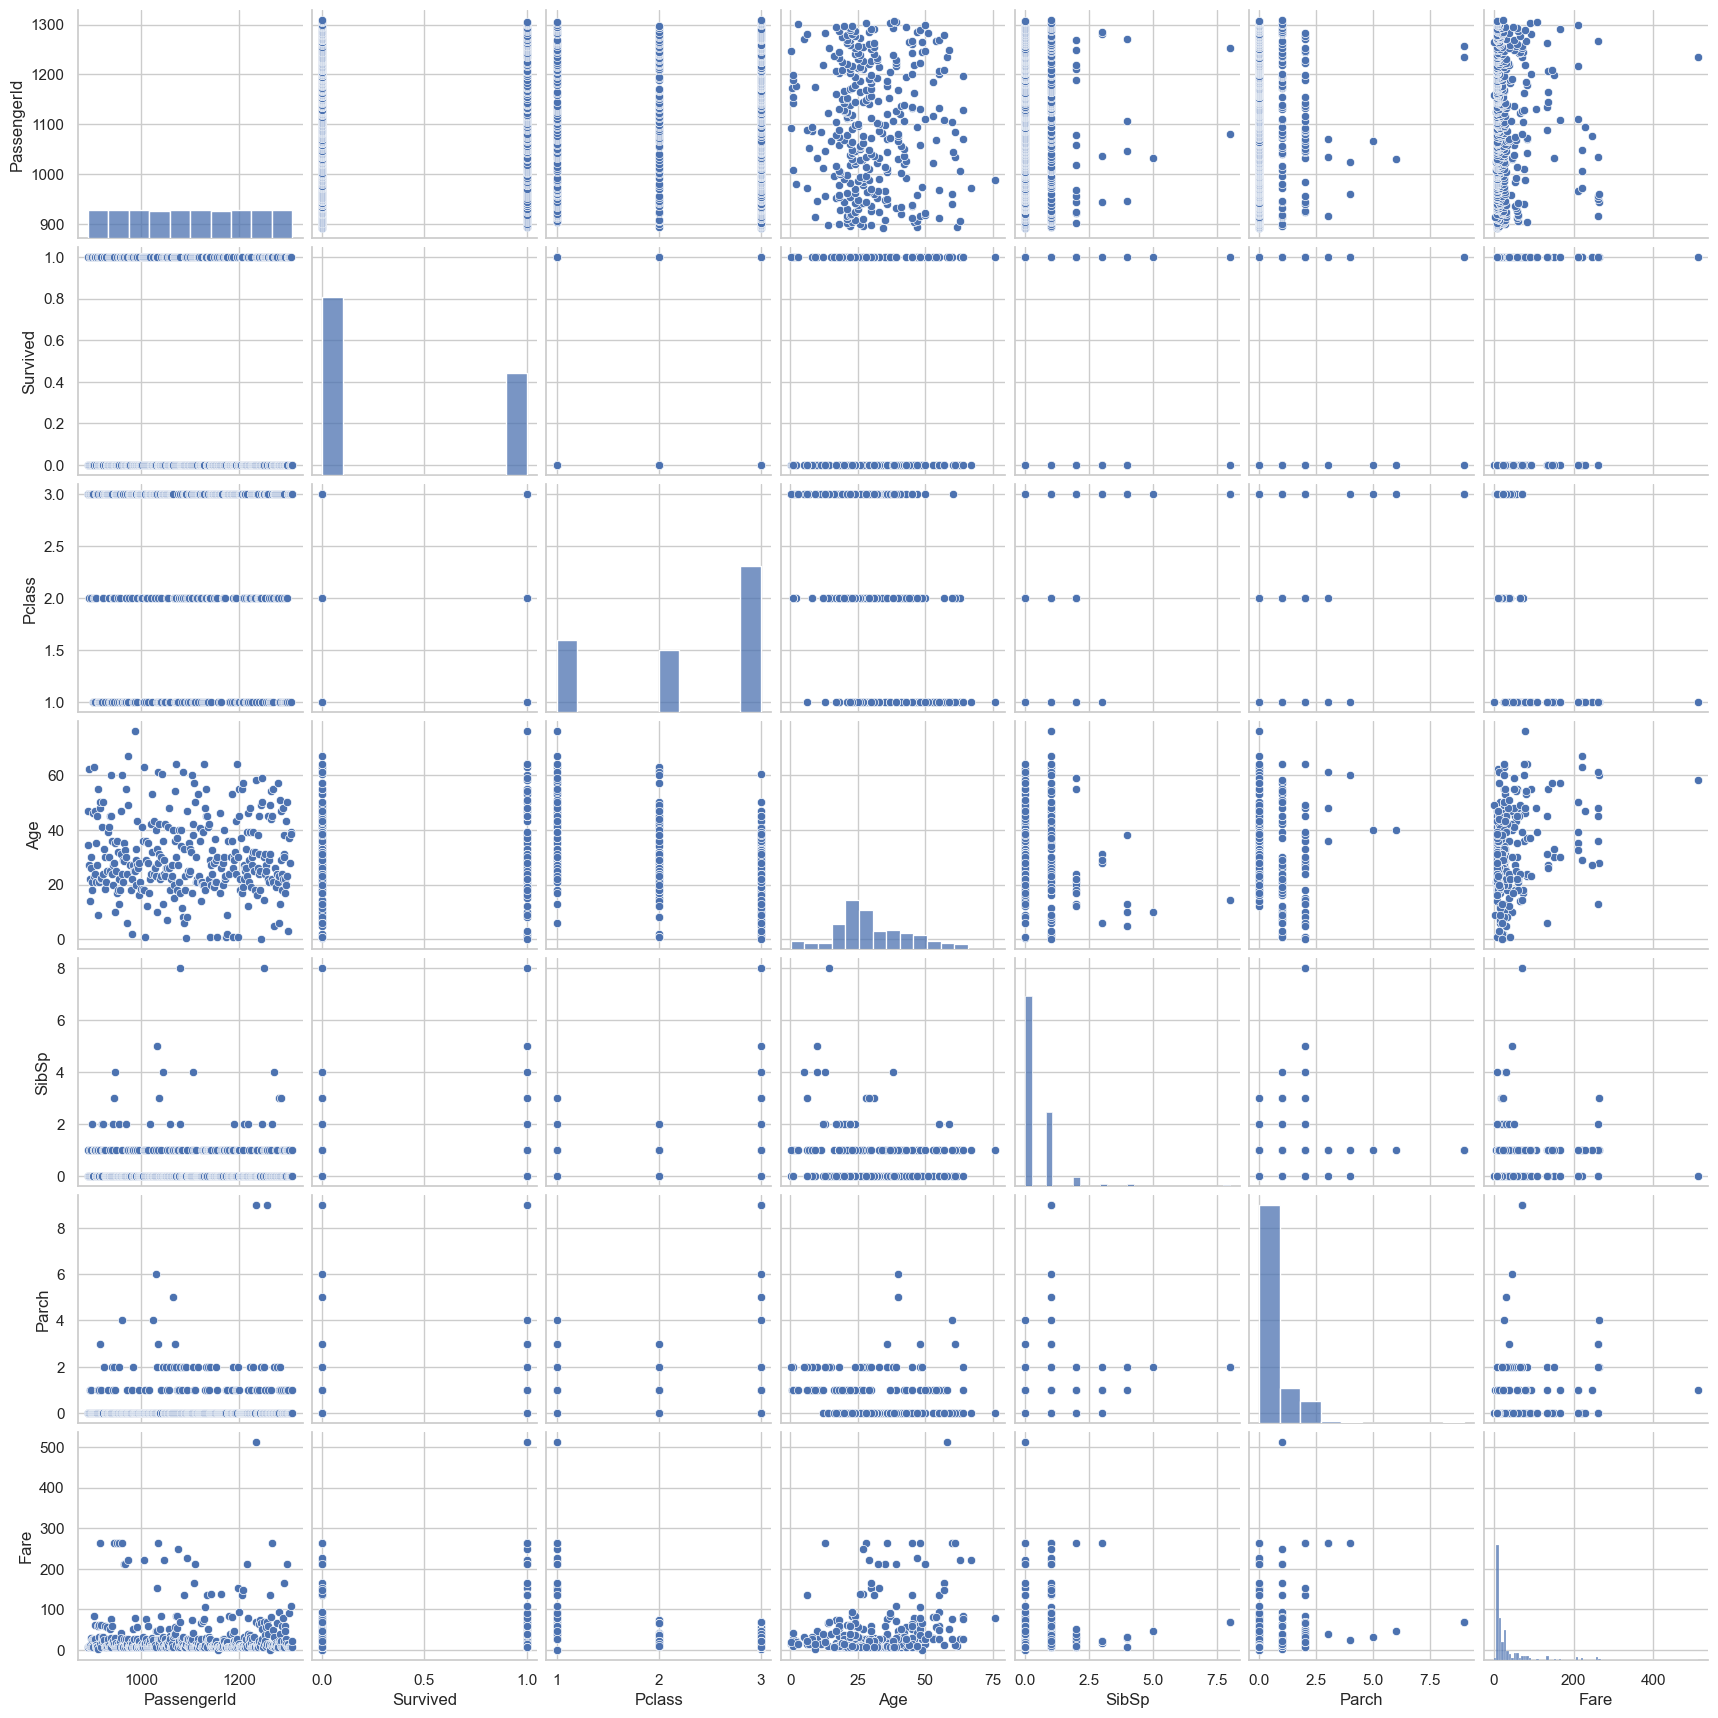

<Figure size 640x480 with 0 Axes>

In [23]:
# Correlation heatmap
plt.figure(figsize = (10,8))
sns.heatmap(df.corr(numeric_only =True ),annot = True, cmap = 'coolwarm')
plt.title('Correlation Heatmap')
plt.show()
plt.savefig('Correlation Heatmap')

# Pairplot for numerical features
sns.pairplot(df.select_dtypes(include = ['float64','int64']))
plt.show()
plt.savefig('Pair Plot')

# Boxplot by category
# Example: if there is a target column like 'Outcome'
# sns.boxplot(data =df , x = 'Outcome', y = 'Age')

# Outliers and Distribution

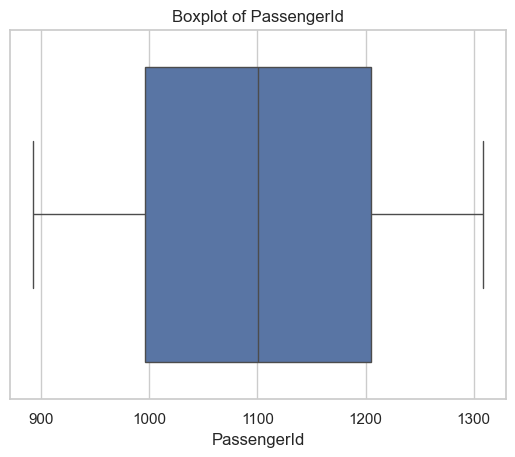

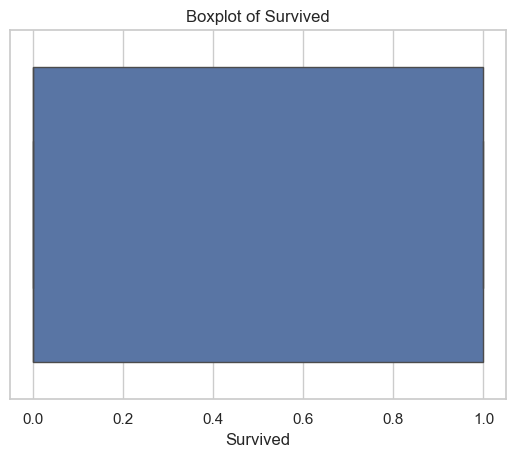

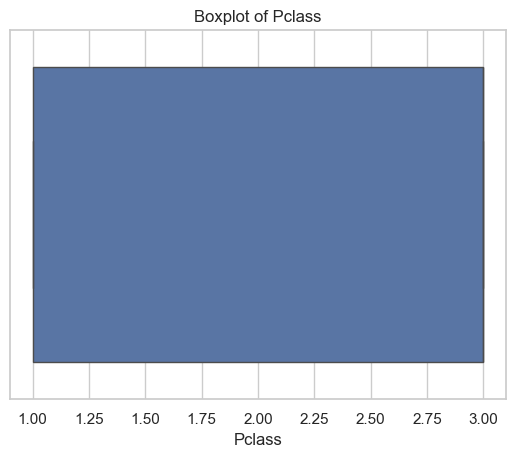

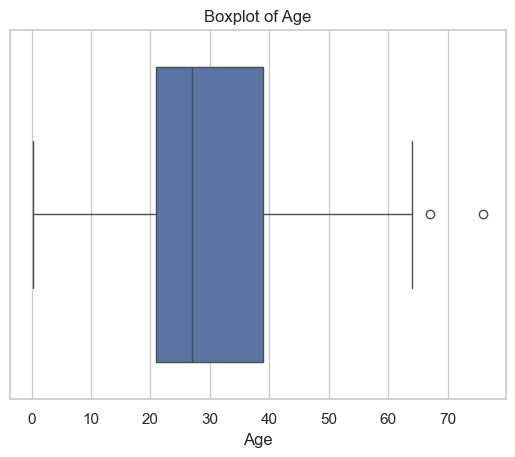

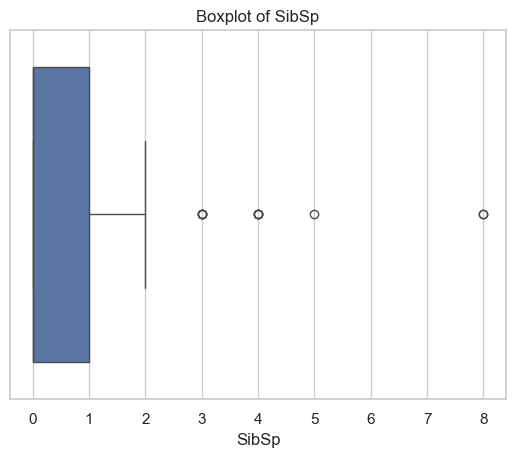

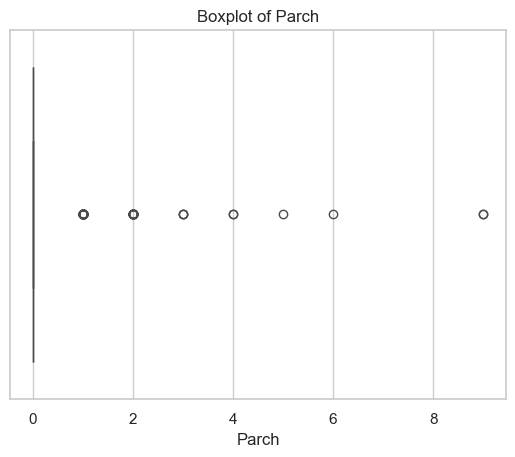

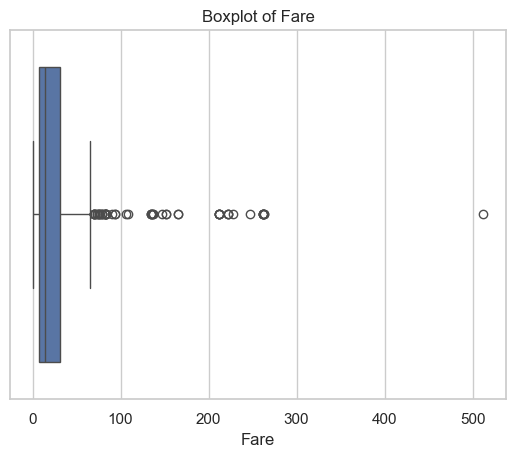

<Figure size 640x480 with 0 Axes>

In [25]:
for col in df.select_dtypes(include = ['float64','int64']):
    sns.boxplot(data = df , x = col)
    plt.title(f'Boxplot of {col}')
    plt.show()
    plt.savefig('BoxPlot')

 Key Patterns
Age distribution centers around young adults (20–30 years), with fewer older passengers.

Fare is highly skewed, with a long tail on the right — most passengers paid low fares, but a few paid extremely high ones.

Most passengers traveled without family (0 in SibSp and Parch), indicating many were likely alone.

Pclass is dominated by 3rd-class passengers, suggesting socioeconomic stratification in ticket classes

Data Quality Issues
Missing Values:

Age: 86 missing values (~20.5%) — important for modeling and should be imputed.

Fare: 1 missing value — minor and easily imputed.

Cabin: 327 missing values (~78%) — may be best to drop this column or treat it as a binary "HasCabin" feature.

Outliers:

Fare has extreme outliers (e.g., > $500) that may distort summary statistics and model training.

High values in SibSp and Parch may also require attention depending on their frequency and modeling goals.

Recommendations for Next Steps
Feature Engineering:

Create a new feature for family size: FamilySize = SibSp + Parch + 1

Bin Fare and Age into categories (e.g., AgeGroup, FareGroup) to reduce skewness.

Create a binary column like HasCabin to indicate whether the passenger had a cabin listed.

Data Cleaning:

Impute missing Age values using the median or predictive models based on other variables.

Impute the single missing Fare value using median by Pclass and Embarked.

Outlier Handling:

Consider log-transforming Fare for modeling to normalize the distribution.

Investigate high SibSp and Parch values to understand their influence.

Further Exploration:

Explore relationships between features and survival (Survived), especially with Sex, Age, Pclass, and Fare.